### Statement of the problem

In this project, my goal is to predict salary on Hitters data using with 322 observations of major league players on 20 predictors: AtBat, Hits, HmRun,Runs, RBI, Walks, Years, CAtBat,CHits, CHmRun ,CRuns ,CRBI ,CWalks ,League ,Division ,PutOuts ,Assists ,Errors ,NewLeague. The dataset is availlable at: https://app.quadstat.net/dataset/r-dataset-package-islr-hitters.

* I want firsly to perform ordinary least squares regression and then ridge and finaly the lasso regression.
* Then, I will select the best model.

We will use the sklearn package in order to perform ridge regression and the lasso. The main functions in this package that we care about are Ridge(), which can be used to fit ridge regression models, and Lasso() which will fit lasso models. They also have cross-validated counterparts: RidgeCV() and LassoCV(). We'll use these a bit later.

Before proceeding, let's first ensure that the missing values have been removed from the data, as described in the previous lab.

### Read data

The Pandas Library is a useful tool that enables us to read various datasets into a data frame. So, let import then.

In [1]:
# import pandas library
import pandas as pd
import numpy as np

In [2]:
# Lowding data set
df = pd.read_csv('Hitters.csv')
print(df.shape)
df.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


We want to know more about our data:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
AtBat        322 non-null int64
Hits         322 non-null int64
HmRun        322 non-null int64
Runs         322 non-null int64
RBI          322 non-null int64
Walks        322 non-null int64
Years        322 non-null int64
CAtBat       322 non-null int64
CHits        322 non-null int64
CHmRun       322 non-null int64
CRuns        322 non-null int64
CRBI         322 non-null int64
CWalks       322 non-null int64
League       322 non-null object
Division     322 non-null object
PutOuts      322 non-null int64
Assists      322 non-null int64
Errors       322 non-null int64
Salary       263 non-null float64
NewLeague    322 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 52.8+ KB


In [4]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

As we can see above, the target ie the variable 'Salary', contains miss values. So, remove miss values from the data.

Since there are categorical variables in our data frame, we nned to transfome them into dummy variables 

In [21]:
# Creating Dummy Variables using 'get_dummies' /création de variables factices
dff = df.copy().reset_index(drop = True).dropna()
dummies = pd.get_dummies(dff[['League', 'Division', 'NewLeague']])

In [22]:
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


### Describe the columns

We would like to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc.

In [23]:
# describe the columns
dff.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


* This shows the statistical summary of all numeric-typed (int, float) columns.
* The variable 'CAtBat' has the largest variance while the variable 'Years' has the smallest variance.
* The value 379.5 divides the variable 'AtBat' into two sets of equal numbers. Its largest value is 687 and its smallest value is 16

### Split data into training and test sets

* Variable have not the standard deviation and they have not the measurement units too. Then, we need to standardize them for suppressing the measurement units and gives the same importance in the computation of distances to each of them.
* We will use the sklearn package in order to perform ridge regression and the lasso.

In [31]:
y = dff.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = dff.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1)
# Define the feature set X.
X_ = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1).astype('float64')
X = X_.reset_index(drop = True)

In [98]:
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [99]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
243,213.0,61.0,4.0,17.0,22.0,3.0,17.0,4061.0,1145.0,83.0,488.0,491.0,244.0,178.0,45.0,4.0,0.0,1.0,0.0
94,510.0,126.0,2.0,42.0,44.0,35.0,11.0,5562.0,1578.0,44.0,703.0,519.0,256.0,207.0,358.0,20.0,1.0,1.0,1.0
236,642.0,211.0,14.0,107.0,59.0,52.0,5.0,2364.0,770.0,27.0,352.0,230.0,193.0,337.0,19.0,4.0,1.0,1.0,1.0
191,309.0,72.0,0.0,33.0,31.0,26.0,5.0,354.0,82.0,0.0,41.0,32.0,26.0,117.0,269.0,12.0,1.0,0.0,1.0
81,441.0,128.0,16.0,70.0,73.0,80.0,14.0,6675.0,2095.0,209.0,1072.0,1050.0,695.0,97.0,218.0,16.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,246.0,76.0,5.0,35.0,39.0,13.0,6.0,912.0,234.0,12.0,102.0,96.0,80.0,44.0,0.0,1.0,0.0,0.0,0.0
255,580.0,207.0,8.0,107.0,71.0,105.0,5.0,2778.0,978.0,32.0,474.0,322.0,417.0,121.0,267.0,19.0,0.0,0.0,0.0
72,382.0,119.0,13.0,54.0,58.0,36.0,12.0,2133.0,594.0,41.0,287.0,294.0,227.0,59.0,156.0,9.0,1.0,1.0,1.0
235,263.0,70.0,1.0,26.0,23.0,30.0,4.0,888.0,220.0,9.0,83.0,82.0,86.0,81.0,147.0,4.0,1.0,0.0,1.0


Now, we are going to perform Ridge regression on the dataset

### Linear regression

In [100]:
# Linear regression

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred_lr = reg.predict(X_test)
mean_squared_error(y_test, pred_lr)

116690.46856661099

Using Linear regression, the error is $\approx$ 116690

### Ridge regression

* The main functions in this package that we care about are Ridge()
* We now split the samples into a training set and a test set in order to estimate the test error of ridge regression:

The Ridge() function takes un argument $\alpha$ that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small:

In [101]:
alphas = 10**np.linspace(10,-6,100)
len(alphas)

100

* To each alpha value we will associate a vector of ridge regression coefficients, which we will store in a coefs matrix.

In [102]:
ridge = Ridge(normalize = True)

coefs = []
mse = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test)
    mse.append(mean_squared_error(y_test, pred))

np.shape(coefs)

(100, 19)

### Model selection 

Plot Ridge coefficients as a function of the regularization L2 and Coefficient error as a function of the regularization L2 to select the best value of $\alpha$ 

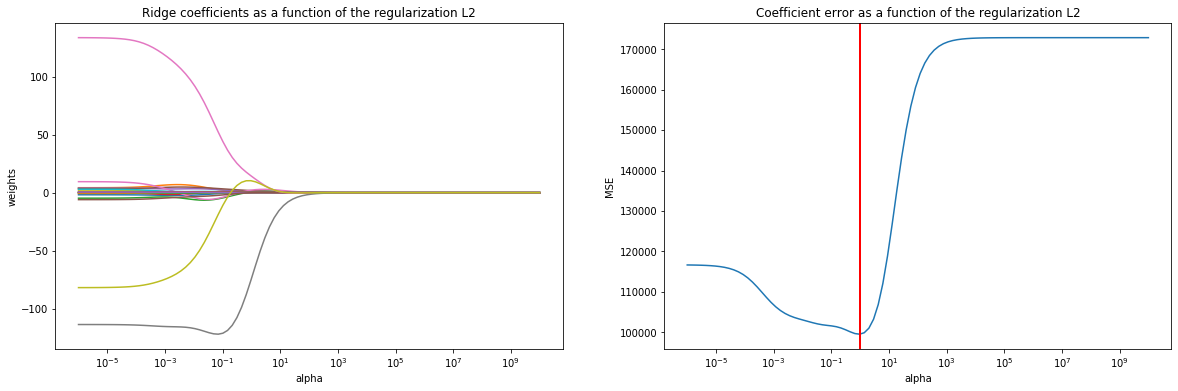

The best alpha is: 0.9545484566618327


In [103]:
%matplotlib inline

import matplotlib.pyplot as plt

# Display results
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization L2')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, mse)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Coefficient error as a function of the regularization L2')
plt.axis('tight')

intersection = [(alphas[i], mse[i]) for i,_ in enumerate(zip(alphas,mse)) if mse[i] == min(mse)]
ax.axvline(intersection[0][0] ,linewidth=2, color='r')
plt.show()

print('The best alpha is:', intersection[0][0])


* If $ \alpha $ goes to zero, the coefficients found by the Ridge regression stabilize towards a vector w. For a large alpha (ie **strong regularization**), the coefficients are smaller (possibly converging to 0), which leads to a simpler and biased solution. These dependencies can be seen in the graph on the left.
 
* The graph on the right shows the mean square error as a function of $\alpha$.

* We see the closer the coefficients are to 0, the more the model converges while the more the regularized models, the more the error increases.

We can see this remark by using $\alpha$ = 4

In [104]:
ridge2 = Ridge(alpha = 4, normalize = True)
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index = X.columns)) # Print coefficients
print('\n','The test MSE when  𝛼  = 4 is:',mean_squared_error(y_test, pred2))          # Calculate the test MSE

AtBat           0.098658
Hits            0.446094
HmRun           1.412107
Runs            0.660773
RBI             0.843403
Walks           1.008473
Years           2.779882
CAtBat          0.008244
CHits           0.034149
CHmRun          0.268634
CRuns           0.070407
CRBI            0.070060
CWalks          0.082795
PutOuts         0.104747
Assists        -0.003739
Errors          0.268363
League_N        4.241051
Division_W    -30.768885
NewLeague_N     4.123474
dtype: float64

 The test MSE when  𝛼  = 4 is: 106216.52238005561


* So, The test MSE when $\alpha$ = 4 is $ \approx $ 106216. 

Now let's see what happens if we use a huge value of $\alpha$, say  $10^{10}$

In [105]:
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred3 = ridge3.predict(X_test)           # Use this model to predict the test data
print('Coefficients of each variable using 𝛼  = 10**10:\n\n',pd.Series(ridge3.coef_, index = X.columns)) # Print coefficients
print('\n','The test MSE when 𝛼  = 10**10 is:',mean_squared_error(y_test, pred3))          # Calculate the test MSE

Coefficients of each variable using 𝛼  = 10**10:

 AtBat          1.317464e-10
Hits           4.647486e-10
HmRun          2.079865e-09
Runs           7.726175e-10
RBI            9.390640e-10
Walks          9.769219e-10
Years          3.961442e-09
CAtBat         1.060533e-11
CHits          3.993605e-11
CHmRun         2.959428e-10
CRuns          8.245247e-11
CRBI           7.795451e-11
CWalks         9.894387e-11
PutOuts        7.268991e-11
Assists       -2.615885e-12
Errors         2.084514e-10
League_N      -2.501281e-09
Division_W    -1.549951e-08
NewLeague_N   -2.023196e-09
dtype: float64

 The test MSE when 𝛼  = 10**10 is: 172862.23580379886


### Cross-validation using Scikit -learning

Another way to select the better parameter $\alpha$ is to use **cross-validation** method in scikit_learn

In [106]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True, store_cv_values=True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.6579332246575655

Par conséquent, nous voyons que la valeur de alpha qui entraîne la plus petite erreur de validation croisée est 0,57. Quel est le test MSE associé à cette valeur d'alpha?

In [107]:
ridge_cv = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_cv.fit(X_train, y_train)
print('The test MSE for RidgeCV is:',mean_squared_error(y_test, ridge4.predict(X_test)))  # Calculate the test MSE


The test MSE for RidgeCV is: 95724.97659123824


* We realize the MSE of the Ridge regression is smaller than the Linear Regression one 

In [108]:
ridge_cv.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

AtBat           0.069155
Hits            0.889574
HmRun           0.510983
Runs            1.076520
RBI             0.879851
Walks           1.662546
Years           1.147263
CAtBat          0.011367
CHits           0.058869
CHmRun          0.414791
CRuns           0.117089
CRBI            0.124389
CWalks          0.048946
PutOuts         0.171940
Assists         0.031834
Errors         -1.457645
League_N       23.194889
Division_W    -81.940853
NewLeague_N     8.866754
dtype: float64

* And we can see that Ridge Regression does not do variables selection

## The Lasso

We now want to verify if the lasso can produce a more precise or more interpretable model than the regression of peak.

Let's use the Lasso () function; however, this time we will need to include the argument max_iter = 10000. Aside from this change, we are proceeding as we did to adjust an edge model:

* 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

/home/students/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5893.504509303719, tolerance: 3050.401923222197
  positive)
/home/students/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12060.404749555513, tolerance: 3050.401923222197
  positive)
/home/students/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24384.889286786318, tolerance: 3050.401923222197
  positive)
/home/students/snap/jupyter/common/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective di

Text(0, 0.5, 'weights')

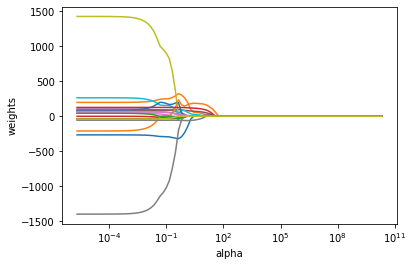

In [122]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [110]:
from sklearn.linear_model import Lasso, LassoCV 
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

104960.65853895503

In [111]:
lassocv.alpha_

2.402973015740077

In [112]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

AtBat           0.000000
Hits            1.082446
HmRun           0.000000
Runs            0.000000
RBI             0.000000
Walks           2.906388
Years           0.000000
CAtBat          0.000000
CHits           0.000000
CHmRun          0.219367
CRuns           0.000000
CRBI            0.513975
CWalks          0.000000
PutOuts         0.368401
Assists        -0.000000
Errors         -0.000000
League_N        0.000000
Division_W    -89.064338
NewLeague_N     0.000000
dtype: float64

* Here we see that 13 of the 19 coefficient estimates are exactly zero:

## ElasticNet Regression

ElasticNet combines the properties of both Ridge and Lasso regression. It works by penalizing the model using both the l2-norm and the l1-nor

In [135]:
elasc = ElasticNet(normalize = True, max_iter = 100000)

coefs_el = []
mse_el = []

for a in alphas:
    elasc.set_params(alpha = a)
    elasc.fit(X_train, y_train)
    coefs_el.append(elasc.coef_)
    pred_el = elasc.predict(X_test)
    mse_el.append(mean_squared_error(y_test, pred_el))

(1.584893192461114e-07,
 63095734448.019424,
 -1541.1350225291771,
 1568.269988337293)

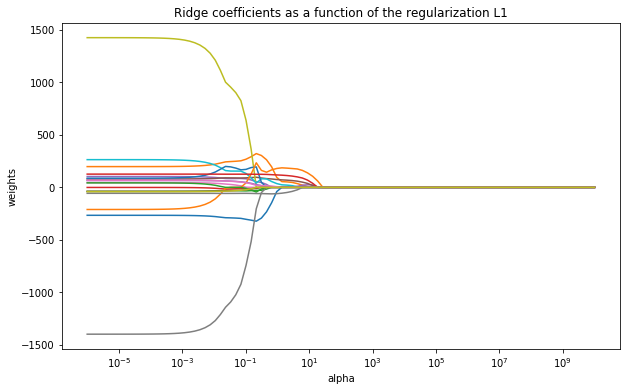

In [132]:
%matplotlib inline

import matplotlib.pyplot as plt

# Display results
plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.plot(alphas, coefs_l)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization L1')
plt.axis('tight')

In [130]:
#Elastic Net
from sklearn.linear_model import ElasticNet, ElasticNetCV


elastic_cv = ElasticNetCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
elastic_cv.fit(X_train, y_train) 
pred_Elacs = elastic_cv.predict(X_test)
mean_squared_error(y_test,pred_Elacs)
print('\n','The test MSE for 𝛼_cv  =', elastic_cv.alpha_, 'is:',mean_squared_error(y_test, pred_e))   # Calculate the test MSE


 The test MSE for 𝛼_cv  = 0.04805946031480155 is: 99699.59588283546


In [134]:
# Coefficients for ElasticNet_CV
pd.Series(elastic_cv.coef_, index=X.columns)

AtBat           0.100607
Hits            0.489363
HmRun           1.410522
Runs            0.703594
RBI             0.913330
Walks           1.124121
Years           2.852180
CAtBat          0.008672
CHits           0.036867
CHmRun          0.294570
CRuns           0.076007
CRBI            0.076596
CWalks          0.088773
PutOuts         0.122098
Assists        -0.004612
Errors          0.264595
League_N        5.553376
Division_W    -36.784820
NewLeague_N     5.214789
dtype: float64

In [ ]:
So, the Elacticnet model does select any variable and its MSE is smaller than the Lasso one.

**Summary**

* If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus **making the model unreliable**.

* To counter this, you can use regularization, a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

* There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:
    * Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
    * Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
    * Elastic Net, a convex combination of Ridge and Lasso.
    * 
    
    
      The size of the respective penalty terms can be tuned via cross-validation to find the model's best fit.